# Training a neural network from scratch with Python.
Let us consider a supervised learning problem where X is a training example with n features. These features are usually known as inputs in neural network and form a first layer of the the network. y (a k dimensional vector) corresponds to label of each training example and belongs to any of k classes. y forms the final layer of the network. In vectorized notation X and y are represented by matrices of sizes m x n and m x k respectively, where m is the total number of examples (data points/ observations). <br>

In a fully connected neural network neurons of each layer share all of the neurons on the preceeding layer. In other words, outputs (usually called activations) of a layer become inputs to the next layer.  

### Getting a dataset
scikit-learn is a python library for machine learning. It has a datasets API which can used to generate data to play with. Let's use a make_moons function to generate 300 2-dimensional data points as shown in the following plot. As seen in the figure data has two types (classes) shown in 2 different colors.  


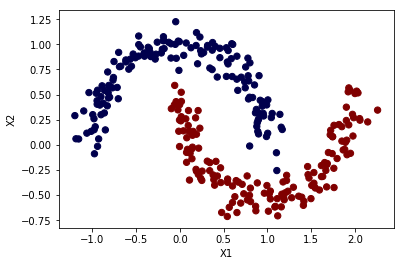

In [177]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import pandas as pd
np.random.seed(0)
X, y = sklearn.datasets.make_moons(300, noise=0.10)
plt.scatter(X[:,0], X[:,1], s=40, c=y, cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()
y = pd.get_dummies(y).values

In [156]:
y.shape

(300, 2)

I am going to use two approaches using two different activation functions for the output layer. 

### Using sigmoid activation and mean squared error (loss function)
Steps: 
#### Forward propogation:<br>
$z^{2} = (W^{1})^{T}X + b^{1}$ <br>
$a^{2} = sigmod(z^{2})$    where $sigmoid(z)= \frac{1}{1+e^{-z}}$

$z^{3} = (W^{2})^{T}a^{2} + b^{2}$ <br>
$a^{3} = sigmod(z^{3})$ <br>

#### Cost Function: (m examples and k outputs)<br>
$J = \frac{1}{m} \sum_{i}^{m} \sum_{k} (a^{3}_{k}-y_{k})^{2} $

#### Back propagation:<br>
$\frac{\partial J}{\partial z^{3}} = \delta ^{3} = (a^{3}-y)\odot f'(z^{3})$    size [m, k]

$\delta ^{2} = (W^{2})^{T}\delta ^{3} \odot f'(z^{2}) $  ---------size [m,  n_hidden] <br>
$\odot $represents item wise product

$\frac{\partial J}{\partial W^{2}} = (a^{2})^{T} \delta^{3} $  matrix of size [n_hidden, k]<br>
$\frac{\partial J}{\partial b^{2}} = \sum^{m} \delta^{3} $ vector of size [1,k]<br> 
$\frac{\partial J}{\partial W^{1}} = X^{T} \delta^{2} $ matrix of size [n_input, n_hidden]<br>
$\frac{\partial J}{\partial b^{1}} = \sum^{m}\delta^{2} $ vector of size [1, n_hidden]<br>

#### Updates:<br>
$W^{l} = W^{l} - \alpha \frac{\partial J}{\partial W^{l}}$
$b^{l} = b^{l} - \alpha \frac{\partial J}{\partial b^{l}}$

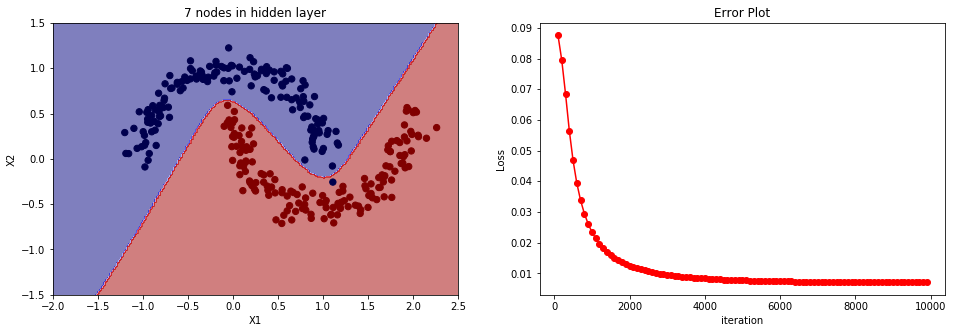

In [181]:
# input layer
#n_input = 2  # number of features
#n_output = 2 # number of labels (classes)
def sigmoid(t):
    return 1./(1.+np.exp(-t))
    

def cost(model,X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z2 = X.dot(W1)+b1
    a2 = sigmoid(z2)
    z3 = a2.dot(W2)+b2
    a3 = sigmoid(z3)
    loss = np.square(a3-y)
    loss = 0.5*np.sum(loss, axis=1)
    return np.average(loss)

def predict(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z2 = X.dot(W1)+b1
    a2 = sigmoid(z2)
    z3 = a2.dot(W2)+b2
    a3 = sigmoid(z3)
    return np.argmax(a3, axis=1)
    
def train(data, target, n_hidden, epoch, alpha_, reg):
    n_input = data.shape[1]
    n_output = target.shape[1]
    np.random.seed(0)
    W1 = np.random.randn(n_input,n_hidden) 
    b1 = np.random.randn(1,n_hidden)
    W2 = np.random.randn(n_hidden,n_output)
    b2 = np.random.randn(1,n_output)
    iterations = []
    error = []
    
    for i in range(epoch):
        alpha = alpha_*np.exp(-np.array(i)*0.0005) 
        #forward prop
        z2 = X.dot(W1)+b1
        a2 = sigmoid(z2)
        #print(a2.shape)
        z3 = a2.dot(W2)+b2
        a3 = sigmoid(z3)
        #print(a3.shape)
        
        
        #back prop 
        delta3 = (a3-y)*a3*(1-a3)   #(y'-y) f'(z)
        #print(delta3.shape)
        dW2 = (a2.T).dot(delta3)
        #print(dW2.shape)
        db2 = np.sum(delta3, axis=0).reshape((1,delta3.shape[1]))
        #print(db2.shape)
        delta2 = (delta3).dot(W2.T)*a2*(1.-a2)
        dW1 = (X.T).dot(delta2)
        db1 = np.sum(delta2, axis=0).reshape((1,delta2.shape[1]))
        #print(db1.shape)
        
        #regularization
        dW2 += reg*W2
        dW1 += reg*W1
        
        #Gradient descent, updating W and b
        W1-= alpha*dW1
        W2-= alpha*dW2
        b1-= alpha*db1
        b2-= alpha*db2
        #print(b2.shape)
        #print(b1.shape)
        parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
        
        if i% 100==0:
            iterations.append(i)
            j = cost(parameters,X)
            error.append(j)
            #print('Steps: %d, Error: %g'%(i,j))
    
    return parameters , iterations, error
        
        

n_hidden = 7
epoch = 10000
alpha = 0.01
reg = 0.01
model, iterations, error = train(X, y, n_hidden, epoch, alpha, reg)


#plot
x1 = np.linspace(-2., 2.5, 200)
x2 = np.linspace(-1.5, 1.5, 200)

x1, x2 = np.meshgrid(x1,x2)

x = np.column_stack((x1.flatten(),x2.flatten()))
z = predict(model,x)

z = z.reshape((200,200))

plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.contourf(x1,x2,z, cmap=plt.cm.seismic, alpha=0.5)
plt.scatter(X[:,0], X[:,1], s=40, c=np.argmax(y, axis=1), cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('%d nodes in hidden layer'%n_hidden)
plt.xlim(-2.,2.5)
plt.ylim(-1.5,1.5)


plt.subplot(122)
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')
plt.show()

## Using sigmoid for the hidden layer and softmax for the final layer.
#### Softmax function:
If $y = [y_{i}], i=1,...,k$ i.e. k classes; softmax(y) is <br>
\begin{align}
softmax(y)= \frac{1}{\sum_{i} e^{y_{i}}} 
\begin{bmatrix} 
e^{y_{1}}\\
e^{y_{2}}\\
\vdots \\
e^{y_{k}}\\
\end{bmatrix}
\end{align}

#### Differentiation of Softmax function:
Consider $p = \frac{e^{y_{i}}}{\sum_{i}e^{y_{i}}}$ <br>

$\frac{\partial p}{\partial y_{i}} = \frac{1}{\sum_{i}e^{y_{i}}} \frac{\partial e^{y_{i}}}{\partial y_{i}} + e^{y_{i}}\frac{\partial}{\partial y_{i}} \frac{1}{\sum_{i}e^{y_{i}}} = \frac{e^{y_{i}}}{\sum_{i}e^{y_{i}}} -  e^{y_{i}}\frac{e^{y_{i}}}{(\sum_{i}e^{y_{i}})^{2}} = p(1-p)$


#### Forward propogation:<br>
$z^{2} = (W^{1})^{T}X + b^{1}$ <br>
$a^{2} = sigmod(z^{2})$    where $sigmoid(z)= \frac{1}{1+e^{-z}}$

$z^{3} = (W^{2})^{T}a^{2} + b^{2}$ <br>
$a^{3} = sigmod(z^{3})$ <br>

#### Cost Function: (m examples and k outputs)<br>
$J = - \frac{1}{m} \sum_{m} \sum_{i} y_{i}.log(y^{'}_{i}) $ <br>
$y^{'}=a^{3}$ is the predicted output i.e. softmax($z^{3}$) in this case. <br>
$J = - \sum_{i} y_{i}.log \frac{e^{z^{3}_{i}}}{\sum_{i}e^{z^{3}_{i}}} $  [$\sum_{m}$ is suppressed.]<br> 
$J = - \sum_{i}( y_{i}.z^{3}_{i} - y_{i}log\sum e^{z^{3}_{i}}) $ <br>
$J = - ( y_{i}.z^{3}_{i} - y_{i}log\sum_{i} e^{z^{3}_{i}} + \sum_{k \ne i} [y_{k}z^{3}_{k} -y_{k}log\sum_{i} e^{z^{3}_{i}}]) $ <br>

$\frac{\partial J}{\partial z^{3}_{i}} = -\begin{bmatrix}y_{i} - y_{i} \frac{e^{z^{3}_{i}}}{\sum_{i}e^{z^{3}_{i}}} - \sum_{k \ne i} y_{k} \frac{e^{z^{3}_{i}}}{\sum_{i} e^{z^{3}_{i}}}\end{bmatrix} = -\begin{bmatrix}y_{i} - \frac{e^{z^{3}_{i}}}{\sum_{i}e^{z^{3}_{i}}} \sum_{i} y_{i}\end{bmatrix} = (a^{3}_{i}-y_{i})$ since $\sum y = 1$

$\delta^{3} = (a^{3}_{i}-y_{i})$

#### Back propagation:<br>
$\frac{\partial J}{\partial z^{3}} = \delta ^{3} = (a^{3}-y)$    size [m, k]

$\delta ^{2} = (W^{2})^{T}\delta ^{3} \odot f'(z^{2}) $  ---------size [m,  n_hidden] <br>
$\odot $represents item wise product

$\frac{\partial J}{\partial W^{2}} = (a^{2})^{T} \delta^{3} $  matrix of size [n_hidden, k]<br>
$\frac{\partial J}{\partial b^{2}} = \sum^{m} \delta^{3} $ vector of size [1,k]<br> 
$\frac{\partial J}{\partial W^{1}} = X^{T} \delta^{2} $ matrix of size [n_input, n_hidden]<br>
$\frac{\partial J}{\partial b^{1}} = \sum^{m}\delta^{2} $ vector of size [1, n_hidden]<br>

#### Updates:<br>
$W^{l} = W^{l} - \alpha \frac{\partial J}{\partial W^{l}}$
$b^{l} = b^{l} - \alpha \frac{\partial J}{\partial b^{l}}$


Steps: 0, Error: 1.3411
Steps: 1000, Error: 0.125283
Steps: 2000, Error: 0.0570623
Steps: 3000, Error: 0.0353873
Steps: 4000, Error: 0.0252615
Steps: 5000, Error: 0.0195809
Steps: 6000, Error: 0.016017
Steps: 7000, Error: 0.0136003
Steps: 8000, Error: 0.0118685
Steps: 9000, Error: 0.010577
Steps: 10000, Error: 0.00958425
Steps: 11000, Error: 0.00880225
Steps: 12000, Error: 0.00817352
Steps: 13000, Error: 0.007659
Steps: 14000, Error: 0.00723142
Steps: 15000, Error: 0.00687128
Steps: 16000, Error: 0.00656433
Steps: 17000, Error: 0.0063
Steps: 18000, Error: 0.00607028
Steps: 19000, Error: 0.00586902


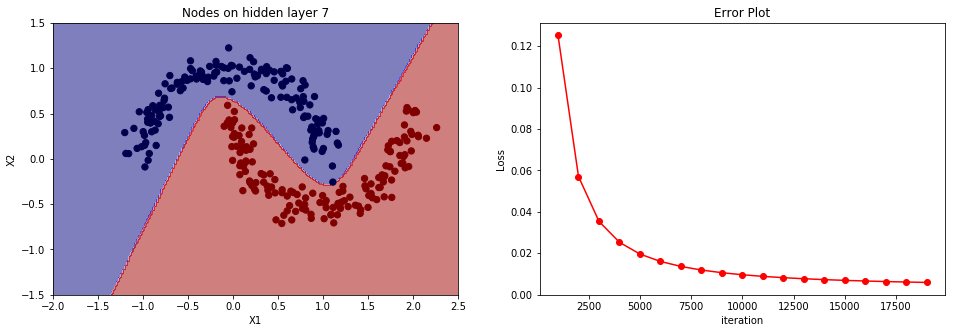

In [180]:
# input layer
#n_input = 2  # number of features
#n_output = 2 # number of labels (classes)
def sigmoid(t):
    return 1./(1.+np.exp(-t))

def softmax(t):
    t = np.exp(t)
    return t/(np.sum(t, axis=1).reshape((len(t),1)))
    

def cost_softmax(model,X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z2 = X.dot(W1)+b1
    a2 = sigmoid(z2)
    z3 = a2.dot(W2)+b2
    a3 = softmax(z3)
    loss = -1.*y*np.log(a3)
    loss = np.sum(loss, axis=1)
    return np.average(loss)

def predict_softmax(model, X):
    W1, b1, W2, b2 = model['W1'], model['b1'], model['W2'], model['b2']
    z2 = X.dot(W1)+b1
    a2 = sigmoid(z2)
    z3 = a2.dot(W2)+b2
    a3 = softmax(z3)
    return np.argmax(a3, axis=1)
    
def train_softmax(data, target, n_hidden, epoch, alpha_, reg):
    n_input = data.shape[1]
    n_output = target.shape[1]
    np.random.seed(0)
    W1 = np.random.randn(n_input,n_hidden) 
    b1 = np.random.randn(1,n_hidden)
    W2 = np.random.randn(n_hidden,n_output)
    b2 = np.random.randn(1,n_output)
    iterations = []
    error = []
    
    for i in range(epoch):
        alpha = alpha_*np.exp(-np.array(i)*0.000005) 
        #forward prop
        z2 = X.dot(W1)+b1
        a2 = sigmoid(z2)
        #print(a2.shape)
        z3 = a2.dot(W2)+b2
        a3 = softmax(z3)
        #print(a3.shape)
        
        
        #back prop 
        delta3 = (a3-y)   #(y'-y) 
        #print(delta3.shape)
        dW2 = (a2.T).dot(delta3)
        #print(dW2.shape)
        db2 = np.sum(delta3, axis=0).reshape((1,delta3.shape[1]))
        #print(db2.shape)
        delta2 = (delta3).dot(W2.T)*a2*(1.-a2)
        dW1 = (X.T).dot(delta2)
        db1 = np.sum(delta2, axis=0).reshape((1,delta2.shape[1]))
        #print(db1.shape)
        
        #regularization
        dW2 += reg*W2
        dW1 += reg*W1
        
        #Gradient descent, updating W and b
        W1-= alpha*dW1
        W2-= alpha*dW2
        b1-= alpha*db1
        b2-= alpha*db2
        #print(b2.shape)
        #print(b1.shape)
        parameters = {'W1':W1, 'b1':b1, 'W2':W2, 'b2':b2}
        
        if i% 1000==0:
            iterations.append(i)
            j = cost_softmax(parameters,X)
            error.append(j)
            print('Steps: %d, Error: %g'%(i,j))
    
    return parameters , iterations, error
        
        

n_hidden = 7

epoch = 20000
alpha = 0.001
reg = 0.01
model, iterations, error = train_softmax(X, y, n_hidden, epoch, alpha, reg)


#plot
x1 = np.linspace(-2., 2.5, 200)
x2 = np.linspace(-1.5, 1.5, 200)

x1, x2 = np.meshgrid(x1,x2)

x = np.column_stack((x1.flatten(),x2.flatten()))
z = predict_softmax(model,x)

z = z.reshape((200,200))

plt.subplots(1,2,figsize=(16,5))
plt.subplot(121)
plt.contourf(x1,x2,z, cmap=plt.cm.seismic, alpha=0.5)
plt.scatter(X[:,0], X[:,1], s=40, c=np.argmax(y, axis=1), cmap=plt.cm.seismic)
plt.xlabel('X1')
plt.ylabel('X2')
plt.title('Nodes on hidden layer %d'%(n_hidden))
plt.xlim(-2.,2.5)
plt.ylim(-1.5,1.5)
 
plt.subplot(122)
plt.plot(iterations[1:], error[1:], 'ro-')
plt.xlabel('iteration')
plt.ylabel('Loss')
plt.title('Error Plot')

plt.show()



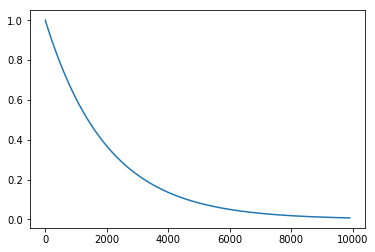

In [185]:
# exponential decay
exp_i = np.exp(-np.array(iterations)*0.0005) 
plt.plot(iterations,exp_i)
plt.show()